**Lab 7** - selected answers in bold

**Instructions:**
Where applicable, use a random_state of 146.

For accuracy of a specific class, we use the definition of "recall" -- (correct predictions for the class)/(all actual values for the class). That is, we are looking at the row-wise calculation in the confusion matrix. 

Throughout these questions I will use some abbreviations:

-X refers to the raw, unscaled, untransformed data

-Xs refers to the data after being standardized

-PCA(X) means to perform a PCA on X

-PCA(Xs) means to perform a PCA on the standardized version of X

-TSNE(X) means to perform a tSNE transformation on X

-TSNE(Xs) means to perform a tSNE transformation on the standardized version of X

-Whenever you are asked to perform both feature scaling as well as dimensionality reduction, do the feature scaling BEFORE the dimensionality reduction

**1**

If we were given a dataset that describes the customers of a grocery store.
We would like to know roughly which sub-groups the customers belong to, but we do not know the predefined sub-groups. 
Which of the following learning algorithms should we use?


K-nearest neighbors


**K-means clustering**


Random forests


Logistic regression

**2**

Which of the following statements is true regarding the objective of K-means clustering? 

The objective is to maximize the within cluster variance

The Kmeans.score returns the within cluster variance

**It uses inertia, obtained by first calculating the variances for the data points within each cluster, and then summing them up**

We can use within cluster variance to compare the performances of clustering algorithms on different datasets

**3**

Which of the following statements are true about K-meaning clustering? Select ALL that apply (there may be more than 1 correct answer). 


Centroids in k-means must be one of the data points from the actual dataset


**A variant of it, called K-Means++, is usually more efficient because it selects the initial centroids sequentially in a way so that they are more distant from each other**


**It is an iterative algorithm that iteratively updates the centroids of the clusters and the membership of the data points** 


**It starts by choosing centroids randomly**


It automatically decides the optimal number of clusters so we don't need to specify it in the training step

**4**

Which of the following statements are true about unsupervised and supervised learning?  Select ALL that apply (there may be more than 1 correct answer).  


The goals for both learning algorithms are the same


Both need labels for the targets to train the models


**Both can deal with more than one-dimensional input features**


**Unsupervised learning can be used as pre-processing steps of supervised learning for preliminary analysis of the data patterns**


Accuracy is used as the metric for evaluating the performance for both of the learning algorithms 

**5**

Which of the following statements are true about unsupervised learning? Select ALL that apply (there may be more than 1 correct answer). 


Dimension reduction algorithms such as PCA and TSNE are useful only when dimension of the data is high (e.g., >5), whereas clustering algorithms like K-means are only useful when dimension of the data is low (e.g., <=5). 


Because K-means clustering and PCA are both unsupervised learning algorithms, their objectives are the same


**K-means clustering, PCA, and TSNE are all unsupervised learning algorithms**


Because K-means clustering and PCA are both unsupervised learning algorithms, so they should be used exclusively. In other words, only one of them should be used in analyzing the same dataset


PCA is a clustering algorithm


**Dimension reduction can be combined with K-means clustering to identify patterns for high-dimensional data**

**6**

For this week's project we will be using the sklearn iris dataset.  Once you have the data loaded, complete the following:



"This dataset contains a total of - data points. 

Within these, there are a total of - different classifications (i.e. species of plant)

Each of which contains a total of - data points."

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris as li
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from intro_Data_5 import *
from sklearn.cluster import KMeans, kmeans_plusplus

In [3]:
# Load data, split into feature/target

data = li()
X = data.data
X_names = data.feature_names

y = data.target
y_names = data.target_names

X_df = pd.DataFrame(X,columns=X_names)

In [4]:
#total data points
print(len(X))

150


150 total data points

In [6]:
#species of plant
y_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

3 species of plants

In [7]:
#data points in each plant species
print(np.count_nonzero(y==0))
print(np.count_nonzero(y==1))
print(np.count_nonzero(y==2))

50
50
50


50 data points in each plant species

**7**

It looks like that the optimal number of clusters k is 3 according to the prior knowledge that we have about the iris data. But let's plot the score-n_clusters curve anyway to validate our assumption. 


To do this, fit 10 K-means clustering models with k ranging from 1 to 10 (inclusive), and get the corresponding scores of the 10 models. Do not scale the features. For k-means, use random_state=146 and n_init=’auto’ and leave init to its default value (init=’k-means++’). 

Based on the curve and scores, the score increases by _ when k increases from 2 to 3,

by _ when k increases from 3 to 4,

and by _ when k increases from 3 to 10. (Keep two decimal places, e.g., 75.86) 

It seems that the increase of score has indeed been drastically dropped after k=3 and therefore k=3 is the 'Elbow' of the curve.

In [53]:
X = data.data

km = KMeans(n_clusters=10, random_state=146, n_init = 'auto')
km.fit(X)

KMeans(n_clusters=10, n_init='auto', random_state=146)

In [8]:
# Get scores for a range of n_clusters
scores=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init='auto') 
    km.fit(X)
    scores.append(km.score(X))
    print(km.score(X),'for k of:', k) 
scores

-681.3705999999995 for k of: 1
-152.347951760358 for k of: 2
-78.85566582597727 for k of: 3
-57.25600931571815 for k of: 4
-52.90178182234433 for k of: 5
-51.180703256302536 for k of: 6
-40.76160769230769 for k of: 7
-35.65414285714285 for k of: 8
-35.09876863354037 for k of: 9
-27.692573828345584 for k of: 10


[-681.3705999999995,
 -152.347951760358,
 -78.85566582597727,
 -57.25600931571815,
 -52.90178182234433,
 -51.180703256302536,
 -40.76160769230769,
 -35.65414285714285,
 -35.09876863354037,
 -27.692573828345584]

In [14]:
score_k2 = scores[1]
score_k3 = scores[2]
increase = abs(score_k2 - score_k3)
print("The score increases by {:.2f} when k increases from 2 to 3.".format(increase))

The score increases by 73.49 when k increases from 2 to 3.


In [15]:
score_k4 = scores[3]
increase = abs(score_k3 - score_k4)
print("The score increases by {:.2f} when k increases from 3 to 4.".format(increase))

The score increases by 21.60 when k increases from 3 to 4.


In [16]:
score_k10 = scores[9]
increase = abs(score_k3 - score_k10)
print("The score increases by {:.2f} when k increases from 3 to 10.".format(increase))

The score increases by 51.16 when k increases from 3 to 10.


**8**

Let's take a closer look at K-means with k=3 (use always random_state=146 and n_init=’auto’). After determining which cluster labels should correspond to which of the actual classifications, how many points appear to be clustered incorrectly? 
**17**

Be sure to compare the correct groups to each other (i.e. make sure that what k-means calls 0 is what is called 0 in the actual data).

In [87]:
km = KMeans(n_clusters=3, random_state=146, n_init = 'auto')
km.fit(X)
groups = km.predict(X)

In [88]:
print(km.predict(X))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [89]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [90]:
groups

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [91]:
real_groups = y
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
# The labels of groups 1 and 2 are reversed. Let's switch them over.
temp = groups == 1

change = groups == 2
groups[temp] = 2
groups[change] = 1

In [101]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.89


Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,47,3
2,0,14,36


**9**

Since we are basing clustering on distance, we might consider standardizing our data for better performance.

On the other hand, all of our features are measured in centimeters - so it might be better to leave the data as is.

Using k = 3, test k-means clustering with standardization and compare with the results in the previous question (without standardization). After determining which cluster labels should correspond to which of the actual classifications, which of the following statements apply? Select ALL answers that apply (i.e. there may be more than 1). 

Be sure to compare the correct groups to each other (i.e. make sure that what k-means calls 0 is what is called 0 in the actual data)


-**There are more misclassified points for the scaled data than the unscaled data.**


-**k-means has the same performance on the Setosa data regardless of scaling**


-k-means has the same performance on the Versicolor data regardless of scaling


-The difference in accuracies is more than 2X (i.e. one of the accuracies is more than 2 times the other)


In [33]:
from sklearn.preprocessing import StandardScaler as SS
Xs = SS().fit_transform(X)

In [34]:
km = KMeans(n_clusters=3, random_state=146, n_init = 'auto')
km.fit(Xs)
groups = km.predict(Xs)

In [35]:
groups

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [36]:
real_groups = y
real_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# The labels of groups 1 and 2 are reversed. Let's switch them over.
temp = groups == 0

change = groups == 2
groups[temp] = 2
groups[change] = 0

In [39]:
temp = groups == 1

change = groups == 2
groups[temp] = 2
groups[change] = 1

In [40]:
conf_matrix, accuracy = compare_classes(real_groups, groups)
conf_matrix

Test accuracy = 0.81


Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,39,11
2,0,17,33


In [41]:
y_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**10**

Finally, we are curious to see how naive K-means compares with K-means++. Run both naive K-means (n_init=10, init=’random’) and K-means++ (n_init=’auto’) on the original Iris data X, without any scaling. Use random_state = 146. Set the range of k from 1 to 10 and plot the score-n_clusters curve for both K-means and K-means++. Which of the following statements are true? When comparing scores (N.b., they are defined in sklearn with a negative sign), keep two decimal places. 



Hint: again, the default initialization method in the KMeans() object is 'k-means++'. To implement a naive K-means, you should set init='random' when you create the KMeans() object.


-The score of K-means++ is lower than naive K-means in at least one of the k values


-**The 'Elbow' point (i.e., optimal number of clusters) is at k=3 for both naive K-means and K-means++**


-The largest difference of scores (in absolute value) between naive K-means and K-means++ is at k=10


-The scores of naive K-means and K-means++ are the same when k is from 1 to 3


-The scores of K-means++ are higher than naive K-means in all values of k


-**The score of K-means++ is higher than naive K-means when k=6**

-681.3705999999995 for k of: 1
-152.347951760358 for k of: 2
-78.85144142614602 for k of: 3
-57.228473214285714 for k of: 4
-49.82227840909091 for k of: 5
-39.06603535353537 for k of: 6
-34.59997871146567 for k of: 7
-30.32581102231104 for k of: 8
-28.400523635403513 for k of: 9
-26.656810145994356 for k of: 10


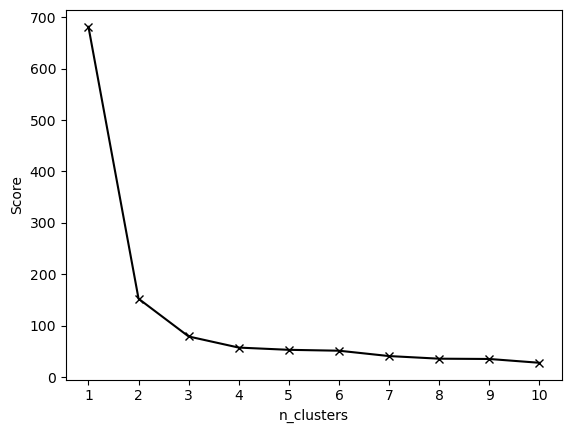

In [47]:
#kmeans
kmeans_scores=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init = 10, init = 'random')
    km.fit(X)
    kmeans_scores.append(km.score(X))
    print(km.score(X),'for k of:', k) 
#plot
plt.plot(k_range, scores, '-xk')
plt.xlabel('n_clusters')
plt.xticks(k_range)
plt.ylabel('Score')
plt.show()

-681.3705999999995 for k of: 1
-152.347951760358 for k of: 2
-78.85566582597727 for k of: 3
-57.25600931571815 for k of: 4
-52.90178182234433 for k of: 5
-51.180703256302536 for k of: 6
-40.76160769230769 for k of: 7
-35.65414285714285 for k of: 8
-35.09876863354037 for k of: 9
-27.692573828345584 for k of: 10


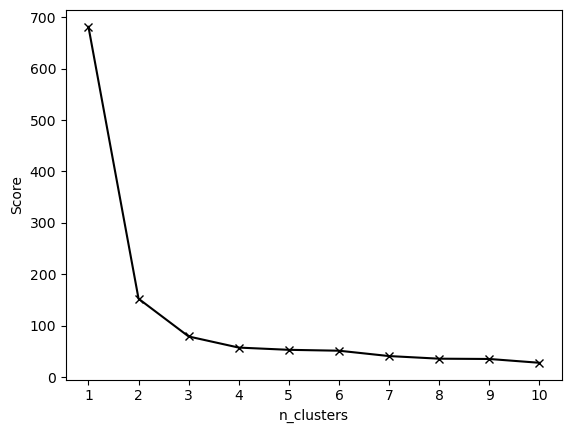

In [48]:
#kmeans++
kplus_scores=[]
k_range = np.arange(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=146, n_init = 'auto')
    km.fit(X)
    kplus_scores.append(km.score(X))
    print(km.score(X),'for k of:', k) 
#plot
plt.plot(k_range, scores, '-xk')
plt.xlabel('n_clusters')
plt.xticks(k_range)
plt.ylabel('Score')
plt.show()

In [49]:
kmeans_scores

[-681.3705999999995,
 -152.347951760358,
 -78.85144142614602,
 -57.228473214285714,
 -49.82227840909091,
 -39.06603535353537,
 -34.59997871146567,
 -30.32581102231104,
 -28.400523635403513,
 -26.656810145994356]

In [50]:
kplus_scores

[-681.3705999999995,
 -152.347951760358,
 -78.85566582597727,
 -57.25600931571815,
 -52.90178182234433,
 -51.180703256302536,
 -40.76160769230769,
 -35.65414285714285,
 -35.09876863354037,
 -27.692573828345584]